In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [3]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 9.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.5 MB/s eta 0:00:0

In [1]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)

In [2]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

# Q14 (A) Write out the form of the linear model.
# What are the regression coefcients?

In [6]:
# Seed the random number generator for reproducibility
rng = np.random.default_rng(10)

# Generate random values for x1 uniformly distributed between 0 and 1
x1 = rng.uniform(0, 1, size=100)

# Generate random values for x2 using a linear combination of x1 and some noise
x2 = 0.5 * x1 + rng.normal(size=100) / 10

# Generate the dependent variable y using a linear model with x1, x2, and some noise
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

Linear Model Form
# y=β0 + β1x1 + β2x2 +ε
regression coefficients
# β0 = 2
#β1 = 2
#β3= 0.3  

#(B) What is the correlation between x1 and x2?

In [7]:
# Calculate the correlation coefficient between two arrays, x1 and x2
correlation_coefficient = np.corrcoef(x1, x2)[0, 1]

# Print the correlation coefficient between x1 and x2
print("Correlation coefficient between x1 and x2:", correlation_coefficient)

Correlation coefficient between x1 and x2: 0.772324497691354


#scatterplot displaying the relationship between the variables

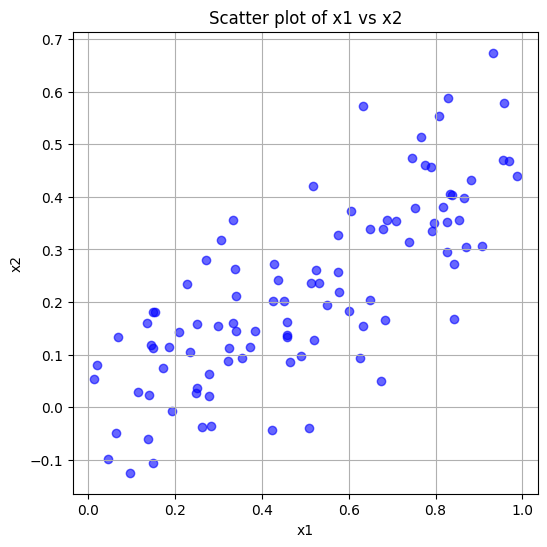

In [14]:
# Create a figure with a specific size
plt.figure(figsize=(6, 6))

# Create a scatter plot of x1 vs x2
plt.scatter(x1, x2, color='blue', alpha=0.6)

# Set title and labels for axes
plt.title("Scatter plot of x1 vs x2")
plt.xlabel("x1")
plt.ylabel("x2")

# Add a grid to the plot
plt.grid(True)

# Display the plot
plt.show()

#(C) fit a least squares regression to predict y using x1 and x2

In [16]:
# Add a constant term to the predictors to estimate the intercept
X = sm.add_constant(np.column_stack((x1, x2)))

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           5.76e-08
Time:                        04:59:32   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

# (D) Now fit least squares regression to predict y using only x1

In [17]:
## Add a constant term to the X1 to estimate the intercept
X_only_x1 = sm.add_constant(x1)
# Fit the linear regression model
model_only_x1 = sm.OLS(y, X_only_x1).fit()

# Print the summary of the regression results
print(model_only_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           1.37e-08
Time:                        05:16:09   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

#Findings
β^1 = 2.0771
p-value less than 0.05
Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that there is statistically significant evidence to suggest that there is a linear relationship between
x1 and Y

# (E) Now fit least squares regression to predict y using only x2

In [18]:
## Add a constant term to the X1 to estimate the intercept
X_only_x2 = sm.add_constant(x2)
# Fit the linear regression model
model_only_x2 = sm.OLS(y, X_only_x2).fit()

# Print the summary of the regression results
print(model_only_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           7.43e-07
Time:                        05:26:52   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

#Findings
β^1 = 2.9103
p-value less than 0.05
Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that there is statistically significant evidence to suggest that there is a linear relationship between
x2 and Y

#(F) Do the results obtained in (c)–(e) contradict each other? Explain your answer.


coefficients are influenced by collinearity when both
X1 and X2 are included in the same model when seperating we found that X2 is linear.

#(G) np.concatenate() to add additional observation to each of x1, x2

In [19]:
# Append a single value (0.1) to the end of the x1 array
x1 = np.concatenate([x1, [0.1]])

# Append a single value (0.8) to the end of the x2 array
x2 = np.concatenate([x2, [0.8]])

# Append a single value (6) to the end of the y array
y = np.concatenate([y, [6]])

In [20]:
#adding constant after using the concate function
X = sm.add_constant(np.column_stack((x1, x2)))

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           4.60e-08
Time:                        06:10:28   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.0

In [21]:
#adding constant
X_only_x1 = sm.add_constant(x1)
# Fit the linear regression model
model_only_x1 = sm.OLS(y, X_only_x1).fit()

# Print the summary of the regression results
print(model_only_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           9.23e-07
Time:                        06:11:47   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.310      0.0

In [22]:
#adding constant
X_only_x2 = sm.add_constant(x2)
# Fit the linear regression model
model_only_x2 = sm.OLS(y, X_only_x2).fit()

# Print the summary of the regression results
print(model_only_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           3.13e-08
Time:                        06:12:24   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.088      0.0